In [1]:
import pandas as pd
import numpy as np
import csv,os,sys,time
import matplotlib.pyplot as plt
import datetime,utm
###测试

import matplotlib.cm as cm
import operator as o
import matplotlib

## 前期库函数准备 之后不再放置
import csv,os,numpy
import numpy as np
import matplotlib.mlab as ml
from matplotlib.tri import Triangulation, UniformTriRefiner
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib.patches import Polygon
import gdal
import matplotlib.cm as cm
import math
import scipy
from matplotlib.collections import PolyCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import PatchCollection

%matplotlib inline
## Add Colorbar
from mpl_toolkits.basemap import Basemap, shiftgrid, cm

f1 = pd.read_csv("../conc/doc/true/2014真值整合表_1月.csv") 
f2 = pd.read_csv("../conc/doc/true/2014真值整合表_4月.csv") 
f3 = pd.read_csv("../conc/doc/true/2014真值整合表_7月.csv") 
f4 = pd.read_csv("../conc/doc/true/2014真值整合表_10月.csv")
xc1,xc2,yc1,yc2 = 113.49805889531724,115.5030664238035,37.39995194888143,38.789235929357105

In [2]:
## R
def p_corr(df1, df2):
    """
    Computes Pearson correlation and its significance (using a t
    distribution) on a pandas.DataFrame.
 
    Ignores null values when computing significance. Based on
    http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient#Testing_using_Student.27s_t-distribution
 
    Args:
        df1 (pandas.DataFrame): one dataset
        df2 (pandas.DataFrame): another dataset
 
    Returns:
        corr (float): correlation between the two datasets
        t (float): an associated t-value
        p (float): one-tailed p-value that the two datasets differ
    """
    corr = df1.corr(df2)
    N = np.sum(df1.notnull())
    t = corr*np.sqrt((N-2)/(1-corr**2))
    p = 1-scipy.stats.t.cdf(abs(t),N-2)  # one-tailed
    return corr, t, p

# p_corr(dsite["GX"],dsite["HG"])
def R_corr(list1,list2):
    "皮尔森相关系数"
    r = list1.corr(list2);
    return r;

## NME
def nme(list1,list2):
    "平均标准误差"
    dif,sdif,sigma=0.0,0.0,0.0;
    for i in range(0,len(list1),1):
        dif   = abs(list1.iloc[i] - list2.iloc[i] )
        sdif  = sdif  + dif
        sigma = sigma + list2.iloc[i] 
    NME = sdif/sigma*100.0;
    return NME;

## RMSE
def rmse(list1,list2):
    "平均标准误差"
    dif,sdif =0.0,0.0;
    for i in range(0,len(list1),1):
        dif   = (list1.iloc[i] - list2.iloc[i] )**2
        sdif  = sdif  + dif
    RMSE = (sdif/len(list1))**0.5;
    return RMSE; 

## 1 浓度分布

In [3]:
x_grid = np.arange(252,326,2)
y_grid = np.arange(4188,4250,2)

x_map1,y_map1 = utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[0]
x_map2,y_map2 = utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[0]

x_s1,y_s1 = utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[0]
x_s2,y_s2 = utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[0]

### 1. 确定 格点位置
### 高新园区 化工学校 人民会堂 世纪公园 西北水源 西南高教 职工医院
MS_xlon = [114 + 35.0/60.0 + 32/3600.0, 114 + 33/60.0, 114.0+30/60.0+32/3600.0, 114+31/60.0+48/3600.0,114.0+26/60.0+21/3600.0,
          114.0+27/60.0+17/3600.0,114.0+26/60.0+31/3600.0, ]
MS_ylat =  [38.0+1/60.0+59/3600.0,38.0+2/60.0+52/3600.0,38+2/60.0+45/3600.0,38+1/60.0+28/3600.0,38.0+9/60.0+58/3600.0,
          38.0+17/3600.0,38+2/60.0+41/3600.0,]

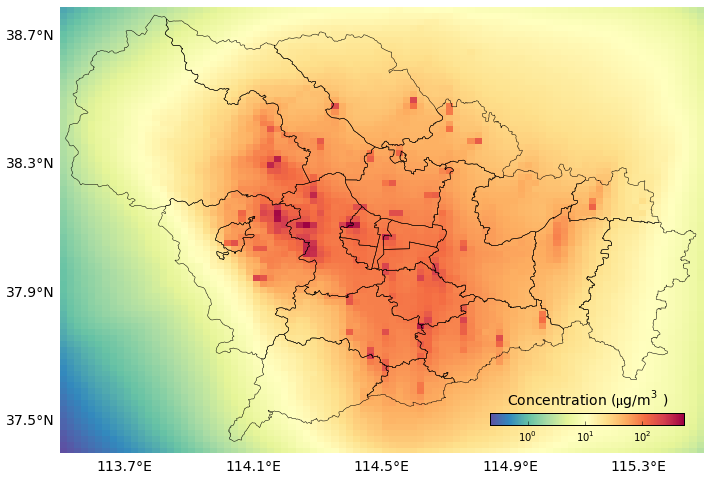

In [34]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()
xi,yi = np.linspace(xc1,xc2,91), np.linspace(yc1,yc2,76)
xi, yi = np.meshgrid(xi, yi)
map = Basemap(llcrnrlon=xc1,llcrnrlat=yc1,urcrnrlon=xc2,urcrnrlat=yc2)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
map.drawparallels(np.arange(yc1+0.1,yc2,0.4),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(xc1+0.202,xc2,0.4),labels=[1,0,0,1],size=14,linewidth=0)
fst =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/1/so2_1_2km_grid.csv")
value_array = fst.VALUE.as_matrix() 
conc = value_array.reshape(75,90)


p =plt.pcolor(xi,yi,conc,cmap=plt.cm.Spectral_r,alpha =1,norm=colors.LogNorm(),zorder =2)

ax.set_frame_on(False)
cbaxes = fig.add_axes([0.625, 0.175, 0.225, 0.02]) 
cbar = plt.colorbar(p,cax=cbaxes,orientation='horizontal')
cbar.ax.set_xlabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',size = 14,labelpad=-55)
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.05,right=0.95)
plt.savefig("./pic/0103//1月so2浓度分布.pdf")

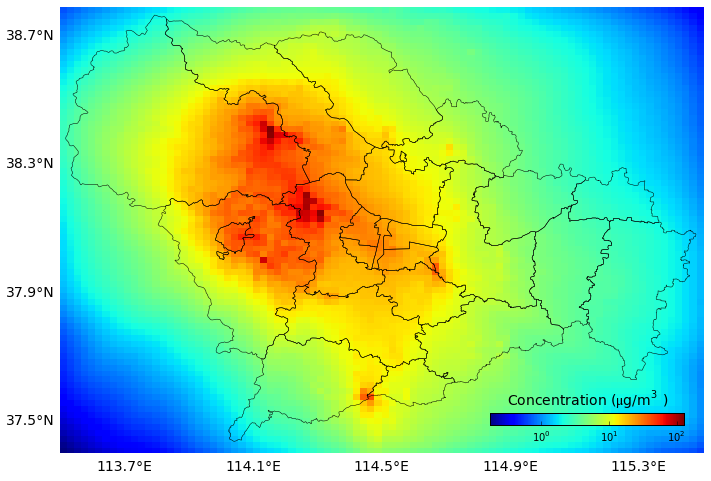

In [39]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()
xi,yi = np.linspace(xc1,xc2,91), np.linspace(yc1,yc2,76)
xi, yi = np.meshgrid(xi, yi)
map = Basemap(llcrnrlon=xc1,llcrnrlat=yc1,urcrnrlon=xc2,urcrnrlat=yc2)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
map.drawparallels(np.arange(yc1+0.1,yc2,0.4),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(xc1+0.202,xc2,0.4),labels=[1,0,0,1],size=14,linewidth=0)
fst =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/10/no2_10_2km_grid.csv")
value_array = fst.VALUE.as_matrix() 
conc = value_array.reshape(75,90)


p =plt.pcolor(xi,yi,conc,cmap=plt.cm.jet,alpha =1,norm=colors.LogNorm(),zorder =2)

ax.set_frame_on(False)
cbaxes = fig.add_axes([0.625, 0.175, 0.225, 0.02]) 
cbar = plt.colorbar(p,cax=cbaxes,orientation='horizontal')
cbar.ax.set_xlabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',size = 14,labelpad=-55)
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.05,right=0.95)
plt.savefig("./pic/0103//10月no2浓度分布.pdf")

### 全年

In [394]:
fst1 =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/1/so2_1_2km_grid.csv")
value_1 = fst1.VALUE.as_matrix() 

fst2 =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/4/so2_4_2km_grid.csv")
value_2 = fst2.VALUE.as_matrix() 

fst3 =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/7/so2_7_2km_grid.csv")
value_3 = fst3.VALUE.as_matrix() 

fst4 =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/10/so2_10_2km_grid.csv")
value_4 = fst4.VALUE.as_matrix() 

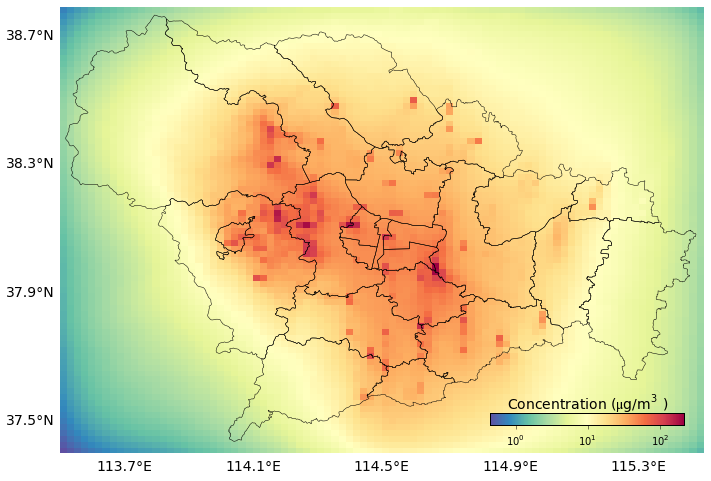

In [396]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()
xi,yi = np.linspace(xc1,xc2,91), np.linspace(yc1,yc2,76)
xi, yi = np.meshgrid(xi, yi)
map = Basemap(llcrnrlon=xc1,llcrnrlat=yc1,urcrnrlon=xc2,urcrnrlat=yc2)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
map.drawparallels(np.arange(yc1+0.1,yc2,0.4),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(xc1+0.202,xc2,0.4),labels=[1,0,0,1],size=14,linewidth=0)
# fst =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/10/no2_10_2km_grid.csv")
# value_array = fst.VALUE.as_matrix() 
value = (value_1 + value_2 + value_3 + value_4)/4.0
conc = value.reshape(75,90)


p =plt.pcolor(xi,yi,conc,cmap=plt.cm.Spectral_r,alpha =1,norm=colors.LogNorm(),zorder =2)

ax.set_frame_on(False)
cbaxes = fig.add_axes([0.625, 0.175, 0.225, 0.02]) 
cbar = plt.colorbar(p,cax=cbaxes,orientation='horizontal')
cbar.ax.set_xlabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',size = 14,labelpad=-55)
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.05,right=0.95)
# plt.savefig("./pic/0103/浓度分布/so2浓度分布-全年.pdf")

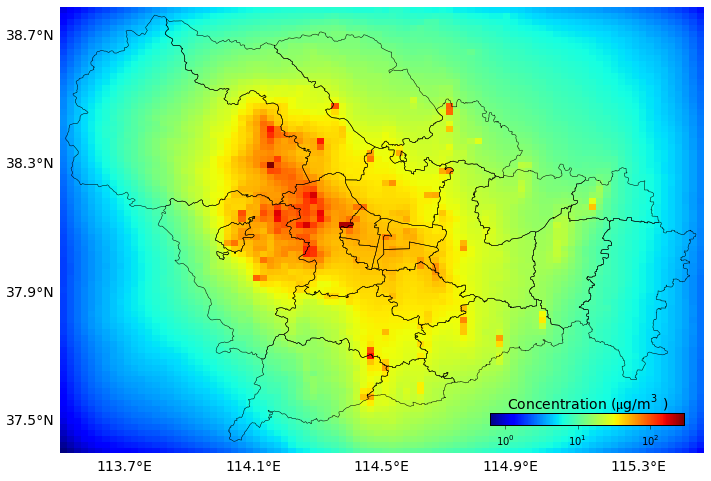

In [399]:
fnt1 =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/1/no2_1_2km_grid.csv")
value_1 = fnt1.VALUE.as_matrix() 

fnt2 =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/4/nox_4_2km_grid.csv")
value_2 = fnt2.VALUE.as_matrix() 

fnt3 =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/7/no2_7_2km_grid.csv")
value_3 = fnt3.VALUE.as_matrix() 

fnt4 =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/10/no2_10_2km_grid.csv")
value_4 = fnt4.VALUE.as_matrix() 

fig=plt.figure(figsize=(12,8))
ax=plt.subplot()
xi,yi = np.linspace(xc1,xc2,91), np.linspace(yc1,yc2,76)
xi, yi = np.meshgrid(xi, yi)
map = Basemap(llcrnrlon=xc1,llcrnrlat=yc1,urcrnrlon=xc2,urcrnrlat=yc2)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
map.drawparallels(np.arange(yc1+0.1,yc2,0.4),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(xc1+0.202,xc2,0.4),labels=[1,0,0,1],size=14,linewidth=0)
# fst =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/10/no2_10_2km_grid.csv")
# value_array = fst.VALUE.as_matrix() 
value = (value_1 + value_2 + value_3 + value_4)/4.0
conc = value.reshape(75,90)


p =plt.pcolor(xi,yi,conc,cmap=plt.cm.jet,alpha =1,norm=colors.LogNorm(),zorder =2)

ax.set_frame_on(False)
cbaxes = fig.add_axes([0.625, 0.175, 0.225, 0.02]) 
cbar = plt.colorbar(p,cax=cbaxes,orientation='horizontal')
cbar.ax.set_xlabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',size = 14,labelpad=-55)
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.05,right=0.95)
plt.savefig("./pic/0103/浓度分布/no2浓度分布-全年.pdf")

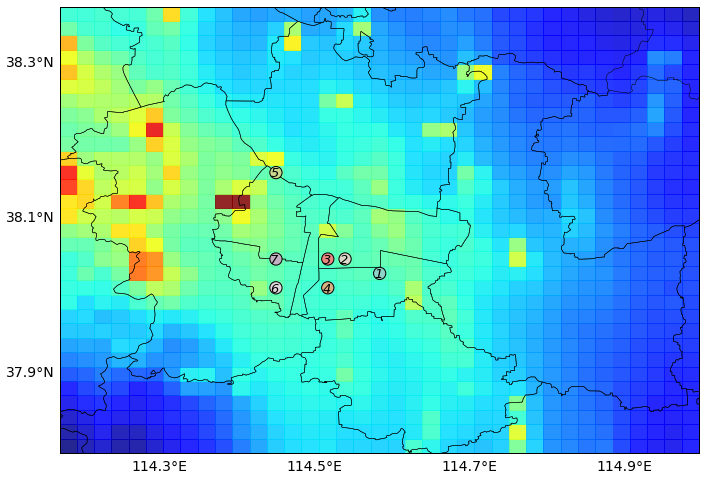

In [546]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()

ax1 = plt.subplot(111)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
fst =pd.read_csv("/Users/HYF/Documents/SJZ/site/data/2km_data/1/no2_1_2km_grid.csv")
value_array = fst.VALUE.as_matrix() 
conc = value_array.reshape(75,90)
conc_ur = conc[21:52,30:67]
p =plt.pcolor(xx,yy,conc_ur ,cmap =plt.cm.jet,alpha =0.85,norm=colors.LogNorm(),zorder =2)

cs=plt.cm.Set3(np.arange(7)/7.)
mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color =cs, zorder = 4,edgecolor = 'k')
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.006,str(i+1),size = 13,color = "k",fontstyle = "italic",zorder =7)
    
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.05,right=0.95)
plt.savefig("./pic/0103/浓度分布/1月no2浓度分布-城区.pdf")   

In [61]:
#### 更换各点的位置
### 高新园区 化工学校 人民会堂 世纪公园 西北水源 西南高教 职工医院
MS_xlon = [114 + 35.0/60.0 + 32/3600.0, 114 + 33/60.0, 114.0+30/60.0+32/3600.0, 114+31/60.0+48/3600.0,114.0+26/60.0+21/3600.0,
          114.0+27/60.0+17/3600.0,114.0+26/60.0+31/3600.0, ]
MS_ylat =  [38.0+1/60.0+59/3600.0,38.0+2/60.0+52/3600.0,38+2/60.0+45/3600.0,38+1/60.0+28/3600.0,38.0+9/60.0+58/3600.0,
          38.0+17/3600.0,38+2/60.0+41/3600.0,]

site1, site2, site3, site4, site5, site6, site7,= [12,18],[13,16],[13,15], [11,15], [19,12],[11,12],[13,12]

In [63]:
MS_xlon = [(lon_grid[18:20].mean()),(lon_grid[16:18].mean()),(lon_grid[15:17].mean()),(lon_grid[15:17].mean()),
          (lon_grid[12:14].mean()),(lon_grid[12:14].mean()),(lon_grid[12:14].mean()),]

MS_ylat = [(lat_grid[12:14].mean()),(lat_grid[13:15].mean()),(lat_grid[13:15].mean()),(lat_grid[11:13].mean()),
          (lat_grid[19:21].mean()),(lat_grid[11:13].mean()),(lat_grid[13:15].mean()),]

In [49]:
lon_grid[18:20]

array([ 114.57321057,  114.5954996 ])

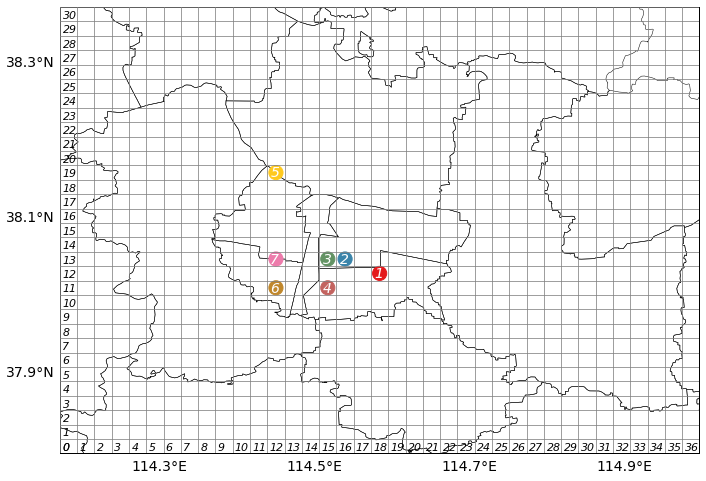

In [64]:
### 新放大图起点
####
x_map1,y_map1 = utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0-1000.0,y_grid[0]*1000.0-1000.0,50,"N")[0]
x_map2,y_map2 = utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0+1000.0,y_grid[-1]*1000.0+1000.0,50,"N")[0]

x_s1,y_s1 = utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[1],utm.to_latlon(x_grid[0]*1000.0,y_grid[0]*1000.0,50,"N")[0]
x_s2,y_s2 = utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[1],utm.to_latlon(x_grid[-1]*1000.0,y_grid[-1]*1000.0,50,"N")[0]

fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)

cs=plt.cm.Set1(np.arange(7)/7.)
mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 200,marker = "o",color = cs, zorder = 2)
label = ["1","2","3","4","5","6","7"]
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.006,str(i+1),size = 14,color = "w",fontstyle = "italic",zorder =2)

lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
for i in range(0,len(lon_grid),1):
     ax.axvline(x=lon_grid[i], linestyle='-', color='grey', linewidth=0.75,    zorder=4)
for i in range(0,len(lat_grid),1):
     ax.axhline(y=lat_grid[i], linestyle='-', color='grey', linewidth=0.75, zorder=4) 
for i in range(0,len(x_grid),1):
    plt.text(lon_grid[i]+0.0035,lat_grid[0]+0.0035,str(i),size = 11,color = "k",fontstyle = "italic",zorder =5)
for i in range(0,len(y_grid),1):
    plt.text(lon_grid[0]+0.0035,lat_grid[i]+0.0035,str(i),size = 11,color = "k",fontstyle = "italic",zorder =5)
    
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.05,right=0.95)
plt.savefig("./pic/0103//研究区域和点位位置.pdf")   

## 2 整体浓度时间轴array的获取

In [65]:
### 整体四月份浓度 hack
import timeit
start = timeit.default_timer()

# Month 1
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/1/so2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        if file == 'so2_2014-01-02-00.csv':
            ds = df.reshape(1,75,90)
        else:    
            ds = np.vstack([ds,df[None, ...]])
            
# Month 4
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/4/so2_grid//")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        ds = np.vstack([ds,df[None, ...]])
## Month 7       
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/7/so2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        ds = np.vstack([ds,df[None, ...]])
        
## Month 10       
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/10/so2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        ds = np.vstack([ds,df[None, ...]])
             
stop = timeit.default_timer()
print stop - start
print ds.shape

245.56922102
(2812, 75, 90)


In [66]:
### 整体四月份浓度 hack no2
import timeit
start = timeit.default_timer()

# Month 1
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/1/no2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        if file == 'no2_2014-01-02-00.csv':
            dn = df.reshape(1,75,90)
        else:    
            dn = np.vstack([dn,df[None, ...]])
            
# Month 4
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/4/no2_grid//")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        dn = np.vstack([dn,df[None, ...]])
## Month 7       
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/7/no2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        dn = np.vstack([dn,df[None, ...]])
        
## Month 10       
os.chdir("/Users/HYF/Documents/SJZ/site/data/2km_data/10/no2_grid/")
files = os.listdir('.')
for file in files:
    filename,extname = os.path.splitext(file)
    if extname == '.csv':
        f = pd.read_csv(file)
        df = (f.VALUE.as_matrix()).reshape(75,90)
        dn = np.vstack([dn,df[None, ...]])
             
stop = timeit.default_timer()
print stop - start
print dn.shape

239.006319046
(2812, 75, 90)


In [67]:
## 2km版本 ===GO !GO !GO !GO!

## 各种定义
dsu = ds[:,21:52,30:67]
dnu = dn[:,21:52,30:67]
site1, site2, site3, site4, site5, site6, site7,= [12,18],[13,16],[13,15], [11,15], [19,11],[11,12],[13,12]
dsite1_s, dsite2_s, dsite3_s, dsite4_s, dsite5_s, dsite6_s, dsite7_s = dsu[:,12,18],dsu[:,13,16],dsu[:,13,15], dsu[:,11,15], dsu[:,19,12],dsu[:,11,12],dsu[:,13,12]
dsite1_n, dsite2_n, dsite3_n, dsite4_n, dsite5_n, dsite6_n, dsite7_n = dnu[:,12,18],dnu[:,13,16],dnu[:,13,15], dnu[:,11,15], dnu[:,19,12],dnu[:,11,12],dnu[:,13,12]

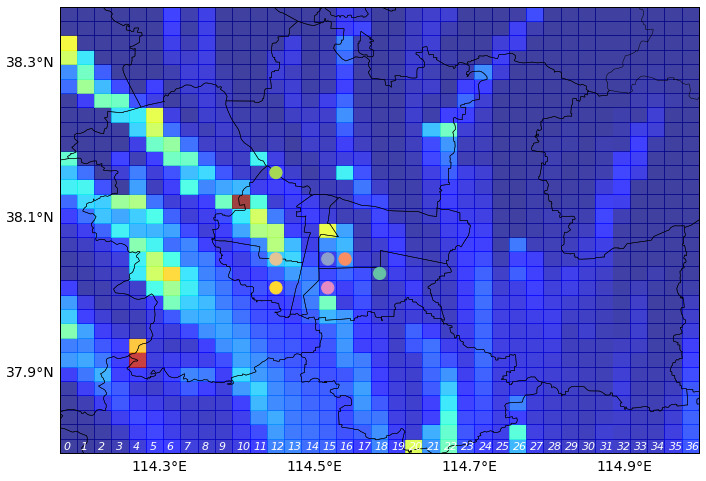

In [436]:
fig=plt.figure(figsize=(12,8))
ax=plt.subplot()

ax1 = plt.subplot(111)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
p =plt.pcolor(xx,yy,dsu[294,:,:],cmap =plt.cm.jet,alpha =0.75,zorder =2)

cs=plt.cm.Set2(np.arange(7)/7.)
mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color = cs, zorder = 4)
for i in range(0,len(x_grid),1):
    plt.text(lon_grid[i]+0.005,lat_grid[0]+0.005,str(i),size = 11,color = "w",fontstyle = "italic",zorder =5)

In [73]:
dsite_s =  pd.read_csv("./data/corr-so2.csv")
dsite_n =  pd.read_csv("./data/corr-no2.csv")

### 分级表述

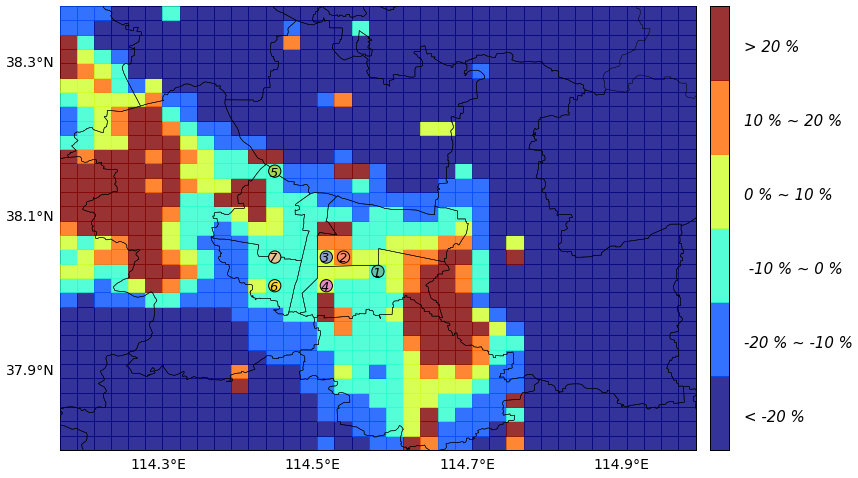

In [476]:
mean_so2 = dsite_s.mean().mean()
rank = np.zeros(31*37)
rank = rank.reshape(31,37)
so2_grid = dsu.mean(axis = 0)
for i in range(0,rank.shape[0],1):
    for j in range(0,rank.shape[1],1):
        ###  > 10%
        if so2_grid[i,j] >= mean_so2*1.2:
            rank[i,j]=5
        if (so2_grid[i,j] >= mean_so2*1.1) & (so2_grid[i,j] < mean_so2*1.2):
            rank[i,j]=4
        if (so2_grid[i,j] >= mean_so2*1.0) & (so2_grid[i,j] < mean_so2*1.1):
            rank[i,j]=3
        if (so2_grid[i,j] >= mean_so2*0.9) & (so2_grid[i,j] < mean_so2*1.0):
            rank[i,j]=2
        if (so2_grid[i,j] >= mean_so2*0.8) & (so2_grid[i,j] < mean_so2*0.9):
            rank[i,j]=1
        if (so2_grid[i,j] < mean_so2*0.8):
            rank[i,j] = 0
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

cMap = plt.cm.get_cmap("jet",lut=6)
p =plt.pcolor(xx,yy,rank,cmap  = cMap,alpha =0.8,zorder =3)

mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color =cs, zorder = 4,edgecolor = 'k')
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.006,str(i+1),size = 13,color = "k",fontstyle = "italic",zorder =7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p, ticks = [],cax=cax)    
list = ["< -20 %","-20 % ~ -10 %"," -10 % ~ 0 %","0 % ~ 10 %","10 % ~ 20 %","> 20 %"]
k = -0.1
for i in range(0,6,1):
    k = k + 1/6.0
    ax.annotate(list[i],xycoords='axes fraction',xy=(1.075,k),fontsize = 15, fontstyle = 'italic',zorder =3)
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.075,right=0.85)    
plt.savefig("./pic/0103/点位选择/so2点位-10%.pdf")

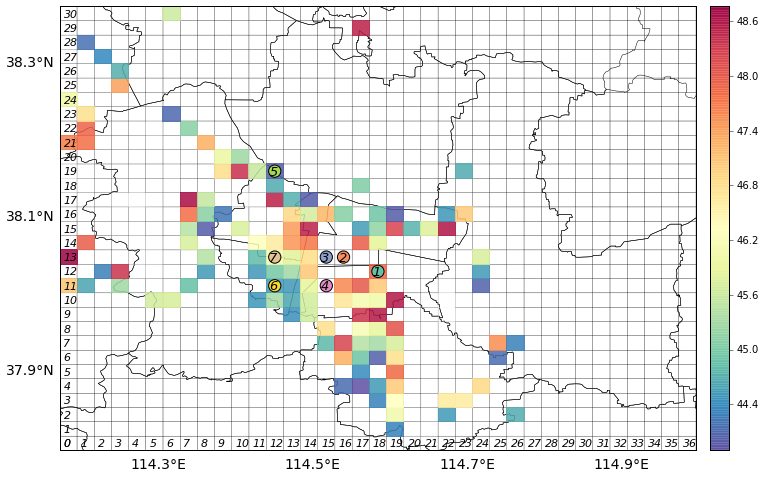

In [205]:
#### 对0--10%区域进行再次分类
so2_select = np.zeros(31*37)
so2_select = so2_select.reshape(31,37)
for i in range(0,rank.shape[0],1):
    for j in range(0,rank.shape[1],1):
        if rank[i,j] == 2:
            so2_select[i,j] = so2_grid[i,j]
            
ss_select = np.ma.masked_less(so2_select,0.001)

fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
p =plt.pcolor(xx,yy,ss_select,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')
ax.autoscale(False)
mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color =cs, zorder = 4,edgecolor = 'k')
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.005,str(i+1),size = 13,color = "k",fontstyle = "italic",zorder =7)
    
for i in range(0,len(x_grid),1):
    plt.text(lon_grid[i]+0.005,lat_grid[0]+0.005,str(i),size = 11,color = "k",fontstyle = "italic",zorder =5)
for i in range(0,len(y_grid),1):
    plt.text(lon_grid[0]+0.005,lat_grid[i]+0.005,str(i),size = 11,color = "k",fontstyle = "italic",zorder =5)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p,cax=cax)    

# plt.savefig("./pic/0103/点位选择/so2_10%原始.pdf")

In [217]:
x_pt,y_pt = [],[]
for i in range(1,24,1):
    for j in range(4,27,1):
        if so2_select[i,j] != 0:
            if((i,j) != (2,26)) & ((i,j) != (18,17)) & ((i,j) != (1,19)) & ((i,j) != (10,5) ) &((i,j) != (19,12) )\
               & ((i,j) != (13,12)) &  ((i,j) != (11,12)) &  ((i,j) != (12,18)):
         
                x_pt.append(j)
                y_pt.append(i)
print len(x_pt)

104


### 主要的几点评价指标
* 超标嗅探
* 代表区域大小
* 现有区域的重复程度

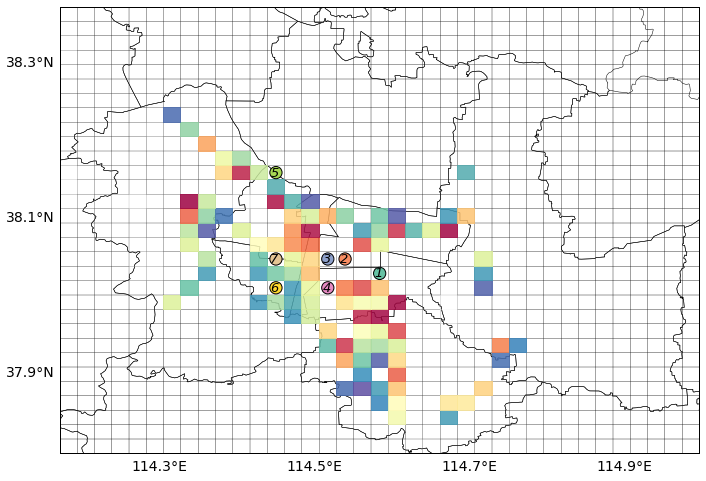

In [279]:
### 点位总数 104
so2_site1 = np.zeros(31*37)
so2_site1 = so2_site1.reshape(31,37)
pt1 = zip(y_pt,x_pt)
for i,j in pt1:
    so2_site1[i,j] = so2_grid[i,j]
    
ss_select = np.ma.masked_less(so2_site1,0.001)

fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
p =plt.pcolor(xx,yy,ss_select,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')    
mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color =cs, zorder = 4,edgecolor = 'k')
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.005,str(i+1),size = 13,color = "k",fontstyle = "italic",zorder =7)
    
    
plt.savefig("./pic/0103/点位选择/筛去行政区域不符.pdf")    

### 重头戏 ==> 制作dataframe 用以承接空间分析的结果

In [218]:
### 如何按照重要性进行排序
## 1. 相关系数 面积最大
## 2. 与现有点位重叠率小

In [229]:
### 预定义
site_so2 = {"name":[],"x":[],"y":[],"cover":[]}
for i in range(0,len(x_pt),1):
    site_so2["name"].append(i+1)
    site_so2["x"].append(x_pt[i])
    site_so2["y"].append(y_pt[i])

In [230]:
### 相关性计算
for i in range(0,len(x_pt),1):
    site_x,site_y = x_pt[i],y_pt[i]
    conc_site = pd.DataFrame(dsu[:,site_y,site_x])
    cover_sum = 0
    for j in range(0,dsu.shape[1],1):
        for k in range(0,dsu.shape[2],1):
            conc_grid = pd.DataFrame(dsu[:,j,k])
            if conc_site[0].corr(conc_grid[0])>0.7:
                cover_sum +=1
    site_so2["cover"].append(cover_sum)
            
                   

In [480]:
### 现有的点位 cover 的均值
site_x_exist = [18,16,15,15,11,12,12]
site_y_exist = [12,13,13,11,19,11,11,13]
cover_exist = 0
kkk = []
for i in range(0,len(site_x_exist),1):
    conc_site_exist = pd.DataFrame(dsu[:,site_y_exist[i],site_x_exist[i]])
    cover_sum =0
    for j in range(0,dsu.shape[1],1):
        for k in range(0,dsu.shape[2],1):
            conc_grid = pd.DataFrame(dsu[:,j,k])
            if conc_site_exist[0].corr(conc_grid[0])>0.7:
                cover_sum +=1
    kkk.append(cover_sum)
    cover_exist = cover_exist+cover_sum
print ("cover_aver" + " = " + str(cover_exist/7.0))


cover_aver = 56.8571428571


In [482]:
kkkk = pd.DataFrame(kkk)
kkkk.to_csv("./现有点位有用的信息.csv",index =False)

In [483]:
kkkk = pd.read_csv("./现有点位信息.csv")

In [484]:
kkkk

,点位名称,x轴坐标,y轴坐标,有效覆盖面积
0,高新园区,18,12,17
1,化工学校,16,13,15
2,人民会堂,15,13,41
3,世纪公园,15,11,45
4,西北水源,12,19,66
5,西南高教,12,11,107
6,职工医院,12,13,107


In [322]:
fsite_so2 =  pd.DataFrame(site_so2)
fsite_so2 = fsite_so2[fsite_so2.cover > 57 ]
len(fsite_so2)

31

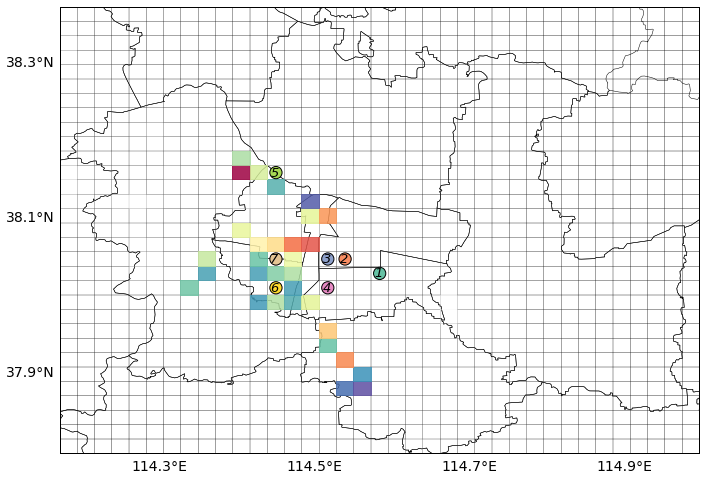

In [335]:
### 点位总数 31
so2_site2 = np.zeros(31*37)
so2_site2 = so2_site2.reshape(31,37)
pt2 = zip(fsite_so2.y,fsite_so2.x)
for i,j in pt2:
    so2_site2[i,j] = so2_grid[i,j]
    
ss_select_2 = np.ma.masked_less(so2_site2,0.1)

fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
p =plt.pcolor(xx,yy,ss_select_2,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')    
mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color =cs, zorder = 4,edgecolor = 'k')
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.005,str(i+1),size = 13,color = "k",fontstyle = "italic",zorder =7)
plt.savefig("./pic/0103/点位选择/31点位.pdf")    

In [389]:
### 重复性计算 31个站点
repe = []
for i in range(0,len(fsite_so2),1):
    ## ks 为每一个站点周边相关性> 0.7的区域范围 用1表示!
    ks= np.zeros(31*37)
    ks = ks.reshape(31,37)
    site_x,site_y = fsite_so2["x"].iloc[i],fsite_so2["y"].iloc[i]
    conc_site = pd.DataFrame(dsu[:,site_y,site_x])
    for j in range(0,dsu.shape[1],1):
        for k in range(0,dsu.shape[2],1):
            conc_grid = pd.DataFrame(dsu[:,j,k])
            if conc_site[0].corr(conc_grid[0])>0.7:
                ks[j,k] = 1
    ktest= np.zeros(31*37)
    ktest = ktest.reshape(31,37)
    for t in range(0,len(site_x_exist),1):
        conc_site_exist = pd.DataFrame(dsu[:,site_y_exist[t],site_x_exist[t]])
        for u in range(0,dsu.shape[1],1):
            for v in range(0,dsu.shape[2],1):
                conc_grid_exist = pd.DataFrame(dsu[:,u,v])
                if (conc_site_exist[0].corr(conc_grid_exist[0])) > 0.7:
                    if ks[u,v] == 1:
                        ktest[u,v] = 1
                else:
                    ktest[u,v]  = 0
    repe.append(ktest.sum())
                
                

    

In [407]:
site_so2_select = {"name":[],"x":[],"y":[],"cover":[],"repe":[],"indep":[]}
for i in range(0,len(fsite_so2),1):
    site_so2_select["name"].append(i+1)
    site_so2_select["x"].append(fsite_so2.x.iloc[i])
    site_so2_select["y"].append(fsite_so2.y.iloc[i])
    site_so2_select["cover"].append(fsite_so2.cover.iloc[i])
    site_so2_select["repe"].append(repe[i])
    site_so2_select["indep"].append(1.0 - repe[i]/fsite_so2.cover.iloc[i])

In [408]:
fsite_so2_select =pd.DataFrame(site_so2_select)
fsite_so2_select.head()


,cover,indep,name,repe,x,y
0,95,0.473684,1,50,16,4
1,89,0.449438,2,49,17,4
2,82,0.426829,3,47,17,5
3,95,0.368421,4,60,16,6
4,97,0.309278,5,67,15,7


In [505]:
so2_decide = fsite_so2_select.sort('indep', ascending=False)
so2_decide.head(10)

,cover,indep,name,repe,x,y
30,74,0.986486,31,1,10,20
29,66,0.984848,30,1,11,19
28,65,0.984615,29,1,10,19
25,58,0.931034,26,4,15,16
26,68,0.882353,27,8,14,17
27,78,0.730769,28,21,12,18
24,58,0.689655,25,18,14,16
0,95,0.473684,1,50,16,4
1,89,0.449438,2,49,17,4
2,82,0.426829,3,47,17,5


In [506]:
### 优选3个点
ka= np.zeros(31*37)
ka = ka.reshape(31,37)
kb= np.zeros(31*37)
kb = kb.reshape(31,37)
kc= np.zeros(31*37)
kc = kc.reshape(31,37)

for i in range(dsu.shape[1]):
    for j in range(dsu.shape[2]):
        k1 = pd.DataFrame(dsu[:,i,j])
        k_a = pd.DataFrame(dsu[:,20,10])
        k_b = pd.DataFrame(dsu[:,16,15])
        k_c = pd.DataFrame(dsu[:,4,16])
        if k1[0].corr(k_a[0]) > 0.7:
            ka[i,j] = 1
        else:
            ka[i,j] = 0
        if k1[0].corr(k_b[0]) > 0.7:
            kb[i,j] = 1
        else:
            kb[i,j] = 0
        if k1[0].corr(k_c[0]) > 0.7:
            kc[i,j] = 1
        else:
            kc[i,j] = 0
 

# # plt.savefig("./pic/0103/点位选择/31点位.pdf")    

In [495]:
x_grid

array([252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276,
       278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302,
       304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324])

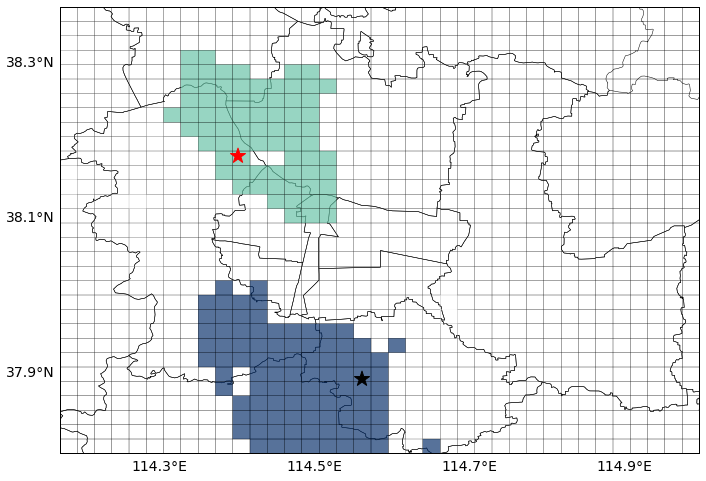

In [515]:
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
ka_select = np.ma.masked_less(ka,0.001)
pa =plt.pcolor(xx,yy,ka_select,cmap="Set2",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)


# kb_select = np.ma.masked_less(kb,0.001)
# pb =plt.pcolor(xx,yy,kb_select,cmap="Set2",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

kc_select = np.ma.masked_less(kc,0.001)
pc =plt.pcolor(xx,yy,kc_select,cmap="Blues_r",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

# p =plt.pcolor(xx,yy,ss_select_2,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
lon_x  = np.linspace(x_map1,x_map2,len(x_grid))
lat_y  = np.linspace(y_map1,y_map2,len(y_grid))

site_a = plt.scatter(lon_x[10],lat_y[20],s =250,zorder =7,marker = "*",color = "r")
site_b = plt.scatter(lon_x[17],lat_y[5],s =250,zorder =7,marker = "*",color = "k")
mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')   

plt.savefig("./pic/0103/点位选择/点位布设-so2-2个潜在点.pdf")

In [550]:
ka

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### 化工学校(2)和人民会堂(3) 世纪公园(4)点位筛检比较方案

In [303]:
k2= np.zeros(31*37)
k2 = k2.reshape(31,37)
k3= np.zeros(31*37)
k3 = k3.reshape(31,37)
k4= np.zeros(31*37)
k4 = k4.reshape(31,37)
for i in range(dsu.shape[1]):
    for j in range(dsu.shape[2]):
        k1 = pd.DataFrame(dsu[:,i,j])
        k_2 = pd.DataFrame(dsu[:,13,16])
        k_3 = pd.DataFrame(dsu[:,13,15])
        k_4 = pd.DataFrame(dsu[:,11,15])
        if k1[0].corr(k_2[0]) > 0.7:
            k2[i,j] = 1
        else:
            k2[i,j] = 0
        if k1[0].corr(k_3[0]) > 0.7:
            k3[i,j] = 1
        else:
            k3[i,j] = 0
        if k1[0].corr(k_4[0]) > 0.7:
            k4[i,j] = 1
        else:
            k4[i,j] = 0

In [232]:
site1, site2, site3, site4, site5, site6, site7,= [12,18],[13,16],[13,15], [11,15], [19,11],[11,12],[13,12]

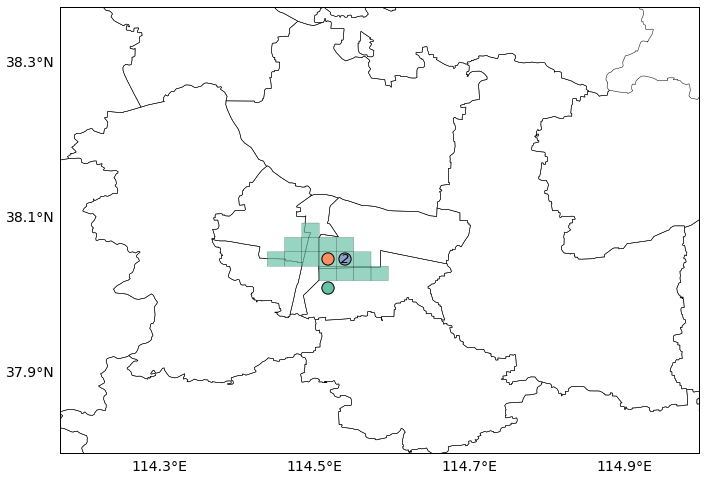

In [313]:
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
# p =plt.pcolor(xx,yy,ss_select,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
# mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')    
mslon,mslat = map(MS_xlon,MS_ylat)
k2_select = np.ma.masked_less(k2,0.001)
p =plt.pcolor(xx,yy,k2_select,cmap="Set2",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

map.scatter(mslon[3],mslat[3],s = 150,color =cs[0], zorder = 7,edgecolor = 'k')
map.scatter(mslon[2],mslat[2],s = 150,color =cs[1], zorder = 7,edgecolor = 'k')
map.scatter(mslon[1],mslat[1],s = 150,color =cs[2], zorder = 7,edgecolor = 'k')

plt.text(mslon[1]-0.005,mslat[1]-0.00525,str(2),size = 13,color = "k",fontstyle = "italic",zorder =7)
plt.savefig("./pic/0103/点位选择/点位2-化工学校.pdf")    


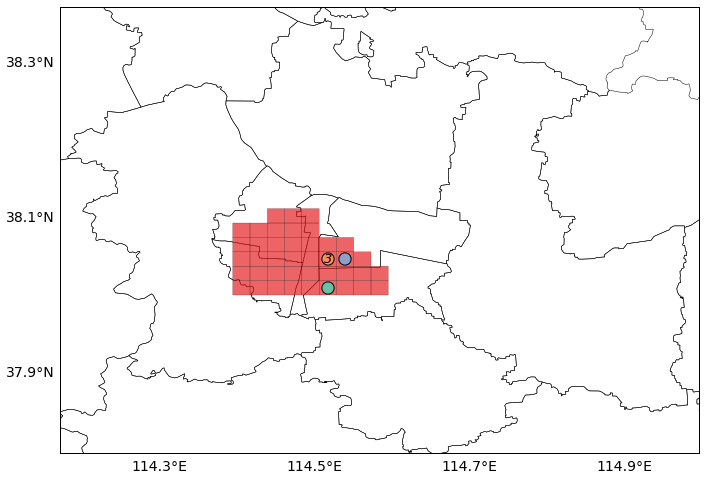

In [311]:
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
# p =plt.pcolor(xx,yy,ss_select,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
# mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')    
mslon,mslat = map(MS_xlon,MS_ylat)
k3_select = np.ma.masked_less(k3,0.001)
p =plt.pcolor(xx,yy,k3_select,cmap="Set1",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

map.scatter(mslon[3],mslat[3],s = 150,color =cs[0], zorder = 7,edgecolor = 'k')
map.scatter(mslon[2],mslat[2],s = 150,color =cs[1], zorder = 7,edgecolor = 'k')
map.scatter(mslon[1],mslat[1],s = 150,color =cs[2], zorder = 7,edgecolor = 'k')

plt.text(mslon[2]-0.005,mslat[2]-0.00525,str(3),size = 13,color = "k",fontstyle = "italic",zorder =7)
plt.savefig("./pic/0103/点位选择/点位3-人民会堂.pdf")    

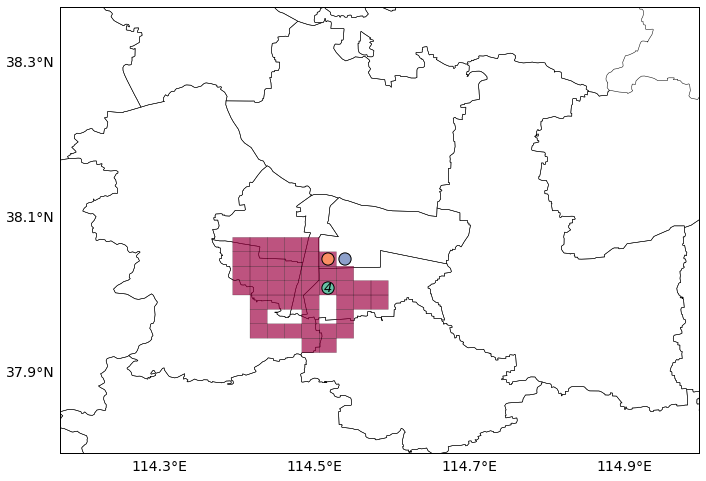

In [315]:
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
# p =plt.pcolor(xx,yy,ss_select,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
# mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')    
mslon,mslat = map(MS_xlon,MS_ylat)
k4_select = np.ma.masked_less(k4,0.001)
p =plt.pcolor(xx,yy,k4_select,cmap="Spectral",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

map.scatter(mslon[3],mslat[3],s = 150,color =cs[0], zorder = 7,edgecolor = 'k')
map.scatter(mslon[2],mslat[2],s = 150,color =cs[1], zorder = 7,edgecolor = 'k')
map.scatter(mslon[1],mslat[1],s = 150,color =cs[2], zorder = 7,edgecolor = 'k')

plt.text(mslon[3]-0.005,mslat[3]-0.00525,str(4),size = 13,color = "k",fontstyle = "italic",zorder =7)
plt.savefig("./pic/0103/点位选择/点位4-世纪公园.pdf")    

In [423]:
lon_x  = np.linspace(x_map1,x_map2,len(x_grid))
lat_y  = np.linspace(y_map1,y_map2,len(y_grid))
xx,yy = np.meshgrid(lon_x,lat_y)

In [433]:
so2_data = {"so2":[],"lon":[],"lat":[]}
for i in range(0,31,1):
    for j in range(0,37,1):
        so2_data["lon"].append(xx[i,j])  
        so2_data["lat"].append(yy[i,j])  
        so2_data["so2"].append(so2_grid[i,j])
        
so2_data = pd.DataFrame(so2_data)
so2_data.to_csv("./data/so2_2014.年均值.csv",index =  False)

In [435]:
no2_data = {"no2":[],"lon":[],"lat":[]}
for i in range(0,31,1):
    for j in range(0,37,1):
        no2_data["lon"].append(xx[i,j])  
        no2_data["lat"].append(yy[i,j])  
        no2_data["no2"].append(no2_grid[i,j])
no2_data = pd.DataFrame(no2_data)
no2_data.to_csv("./data/no2_2014.年均值.csv",index =  False)

In [451]:
k1= np.zeros(31*37)
k1 = k1.reshape(31,37)
k6= np.zeros(31*37)
k6 = k6.reshape(31,37)
for i in range(dsu.shape[1]):
    for j in range(dsu.shape[2]):
        k_ij = pd.DataFrame(dsu[:,i,j])
        k_1 = pd.DataFrame(dsu[:,12,18])
        k_6 = pd.DataFrame(dsu[:,11,12])
        if k_ij[0].corr(k_1[0]) > 0.7:
            k1[i,j] = 1
        else:
            k1[i,j] = 0
        if k_ij[0].corr(k_6[0]) > 0.7:
            k6[i,j] = 1
        else:
            k6[i,j] = 0

### 西南高教(6)和高新园区(1)点位

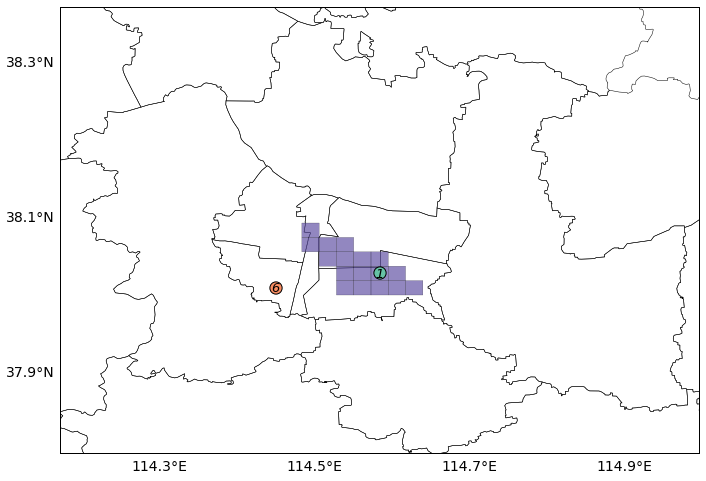

In [458]:
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
# p =plt.pcolor(xx,yy,ss_select,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
# mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')    
mslon,mslat = map(MS_xlon,MS_ylat)
k1_select = np.ma.masked_less(k1,0.001)
p =plt.pcolor(xx,yy,k1_select,cmap="Spectral_r",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

map.scatter(mslon[0],mslat[0],s = 150,color =cs[0], zorder = 7,edgecolor = 'k')
map.scatter(mslon[5],mslat[5],s = 150,color =cs[1], zorder = 7,edgecolor = 'k')


plt.text(mslon[5]-0.005,mslat[5]-0.00525,str(6),size = 13,color = "k",fontstyle = "italic",zorder =7)
plt.text(mslon[0]-0.005,mslat[0]-0.00525,str(1),size = 13,color = "k",fontstyle = "italic",zorder =7)
plt.savefig("./pic/0103/点位选择/点位1-高新园区.pdf")    


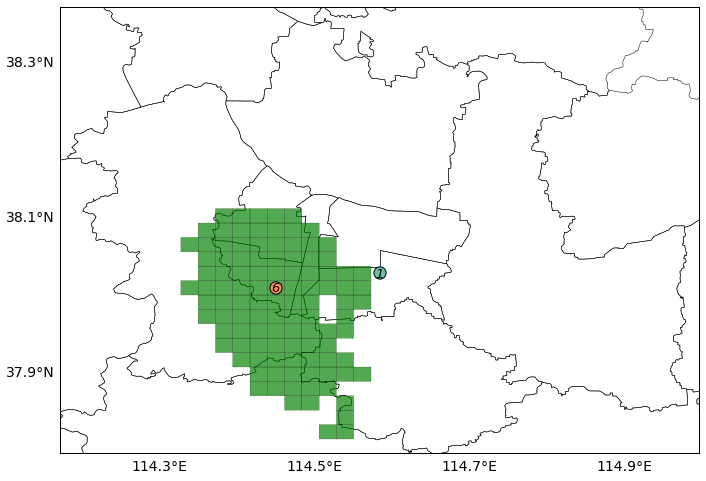

In [454]:
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =1)
# p =plt.pcolor(xx,yy,ss_select,cmap =plt.cm.Spectral_r,alpha =0.85,zorder =2)
# mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')    
mslon,mslat = map(MS_xlon,MS_ylat)
k6_select = np.ma.masked_less(k6,0.001)
p =plt.pcolor(xx,yy,k6_select,cmap="ocean",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

map.scatter(mslon[0],mslat[0],s = 150,color =cs[0], zorder = 7,edgecolor = 'k')
map.scatter(mslon[5],mslat[5],s = 150,color =cs[1], zorder = 7,edgecolor = 'k')


plt.text(mslon[5]-0.005,mslat[5]-0.00525,str(6),size = 13,color = "k",fontstyle = "italic",zorder =7)
plt.text(mslon[0]-0.005,mslat[0]-0.00525,str(1),size = 13,color = "k",fontstyle = "italic",zorder =7)
plt.savefig("./pic/0103/点位选择/点位6-西南高教.pdf")    


### 提问环节-2016-01-09

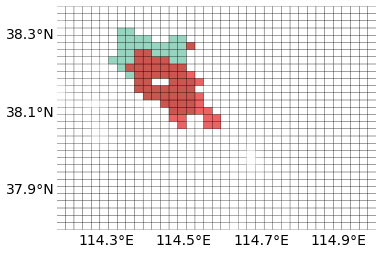

In [571]:
fig=plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_frame_on(False)
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)

ka_select = np.ma.masked_less(ka,0.001)
pa =plt.pcolor(xx,yy,ka_select,cmap="Set2",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)


kb_select = np.ma.masked_less(kb,0.001)
pb =plt.pcolor(xx,yy,kb_select,cmap="Set1",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')   

lon_x  = np.linspace(x_map1,x_map2,len(x_grid))
lat_y  = np.linspace(y_map1,y_map2,len(y_grid))

# site_a = plt.scatter(lon_x[10],lat_y[20],s =250,zorder =7,marker = "*",color = "r")
# site_b = plt.scatter(lon_x[17],lat_y[5],s =250,zorder =7,marker = "*",color = "k")

In [564]:
ka_csv = pd.DataFrame(ka.ravel())
ka_csv.to_csv("./data/提问ka.csv",index = False)

In [565]:
kb_csv = pd.DataFrame(kb.ravel())
kb_csv.to_csv("./data/提问kb.csv",index = False)

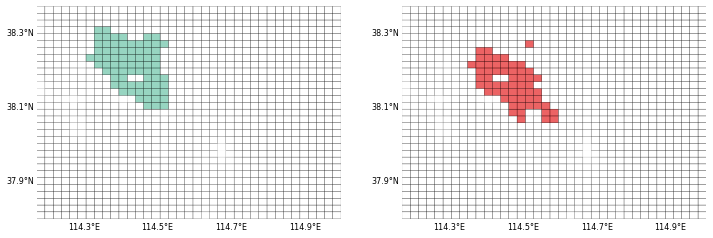

In [572]:
fig=plt.figure(figsize=(12,8))
ax1 = plt.subplot(121)
ax1.set_frame_on(False)
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=8,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=8,linewidth=0)
mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k') 

ka_select = np.ma.masked_less(ka,0.001)
pa =plt.pcolor(xx,yy,ka_select,cmap="Set2",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

ax2 = plt.subplot(122)
ax2.set_frame_on(False)
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=8,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=8,linewidth=0)
kb_select = np.ma.masked_less(kb,0.001)
pb =plt.pcolor(xx,yy,kb_select,cmap="Set1",alpha =0.68,facecolor = "k",edgecolor = 'k',zorder =6)

mesh =plt.pcolor(xx,yy,so2_grid,cmap="gray",alpha =0.85,facecolor = "none",edgecolor = 'k')   

lon_x  = np.linspace(x_map1,x_map2,len(x_grid))
lat_y  = np.linspace(y_map1,y_map2,len(y_grid))

# site_a = plt.scatter(lon_x[10],lat_y[20],s =250,zorder =7,marker = "*",color = "r")
# site_b = plt.scatter(lon_x[17],lat_y[5],s =250,zorder =7,marker = "*",color = "k")
plt.savefig("./shiyannnn.png")

In [460]:
k1.sum()


17.0

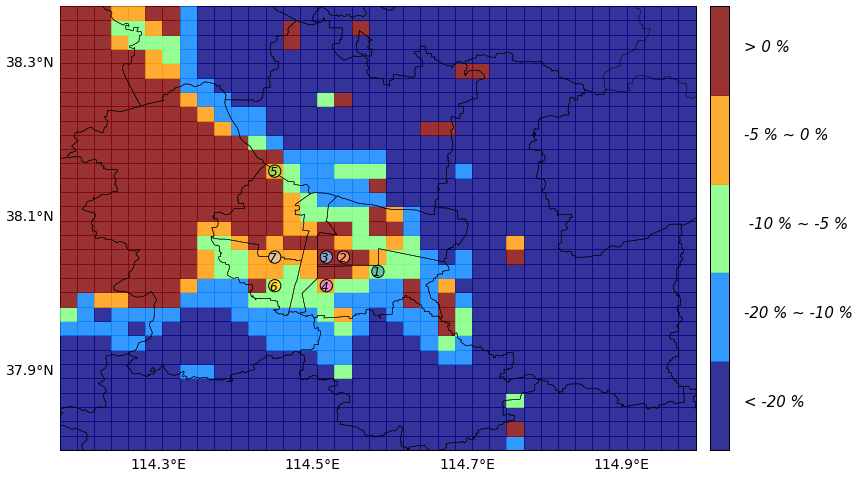

In [470]:
mean_no2 = dsite_n.mean().mean()
rank = np.zeros(31*37)
rank = rank.reshape(31,37)
no2_grid = dnu.mean(axis = 0)
for i in range(0,rank.shape[0],1):
    for j in range(0,rank.shape[1],1):
        ###  > 10%
        if no2_grid[i,j] >= mean_no2*1:
            rank[i,j]=4
        if (no2_grid[i,j] >= mean_no2*0.95) & (no2_grid[i,j] < mean_no2*1):
            rank[i,j]=3
        if (no2_grid[i,j] >= mean_no2*0.9 ) & (no2_grid[i,j] < mean_no2*0.95):
            rank[i,j]=2
        if (no2_grid[i,j] >= mean_no2*0.8) & (no2_grid[i,j] < mean_no2*0.9):
            rank[i,j]=1
        if (no2_grid[i,j] < mean_no2*0.8):
            rank[i,j] = 0
            
            
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

cMap = plt.cm.get_cmap("jet",lut=5)
p =plt.pcolor(xx,yy,rank,cmap  = cMap,alpha =0.8,zorder =3)

mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color =cs, zorder = 4,edgecolor = 'k')
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.0055,str(i+1),size = 12,color = "k",fontstyle = "italic",zorder =7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p, ticks = [],cax=cax)    
list = ["< -20 %","-20 % ~ -10 %"," -10 % ~ -5 %","-5 % ~ 0 %","> 0 %"]
k = -0.1
for i in range(0,5,1):
    k = k + 1/5.0
    ax.annotate(list[i],xycoords='axes fraction',xy=(1.075,k),fontsize = 15, fontstyle = 'italic',zorder =3)
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.075,right=0.85)
plt.savefig("./pic/0103/no2点位-5-10%.pdf")

## -5 % - - 15% 版本

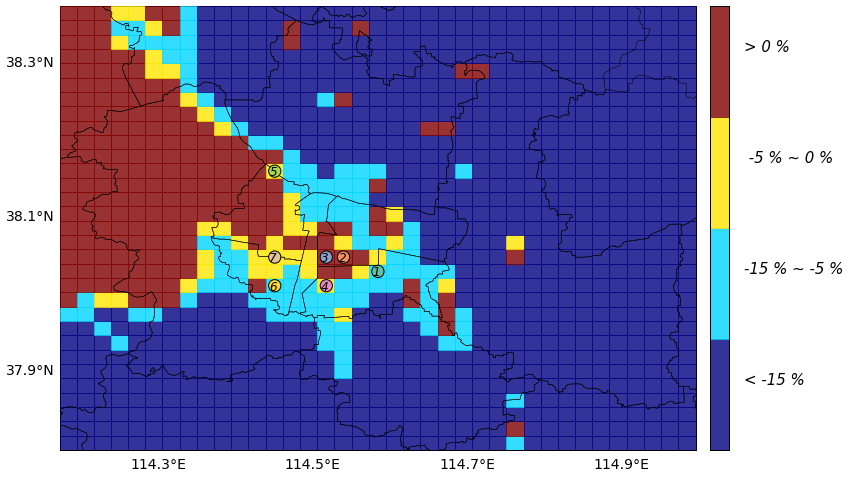

In [473]:
mean_no2 = dsite_n.mean().mean()
rank = np.zeros(31*37)
rank = rank.reshape(31,37)
no2_grid = dnu.mean(axis = 0)
for i in range(0,rank.shape[0],1):
    for j in range(0,rank.shape[1],1):
        ###  > 10%
        if no2_grid[i,j] >= mean_no2*1:
            rank[i,j]=4
        if (no2_grid[i,j] >= mean_no2*0.95) & (no2_grid[i,j] < mean_no2*1):
            rank[i,j]=3
        if (no2_grid[i,j] >= mean_no2*0.85 ) & (no2_grid[i,j] < mean_no2*0.95):
            rank[i,j]=2
        if (no2_grid[i,j] < mean_no2*0.85):
            rank[i,j] = 1
            
            
fig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
lon_grid  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid,lat_grid)

cMap = plt.cm.get_cmap("jet",lut=4)
p =plt.pcolor(xx,yy,rank,cmap  = cMap,alpha =0.8,zorder =3)

mslon,mslat = map(MS_xlon,MS_ylat)
map.scatter(mslon,mslat,s = 150,color =cs, zorder = 4,edgecolor = 'k')
for i in range(0,7,1):
    plt.text(mslon[i]-0.0065,mslat[i]-0.0055,str(i+1),size = 12,color = "k",fontstyle = "italic",zorder =7)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.2)
cbar = plt.colorbar(p, ticks = [],cax=cax)    
list = ["< -15 %","-15 % ~ -5 %"," -5 % ~ 0 %","> 0 %"]
k = -0.1
for i in range(0,4,1):
    k = k + 1/4.0
    ax.annotate(list[i],xycoords='axes fraction',xy=(1.075,k),fontsize = 15, fontstyle = 'italic',zorder =3)
fig.subplots_adjust(wspace=0.15, hspace=0.1, left = 0.075,right=0.85)
plt.savefig("./pic/0103/no2点位-5-10--15%.pdf")

### 2. 浓度分布图

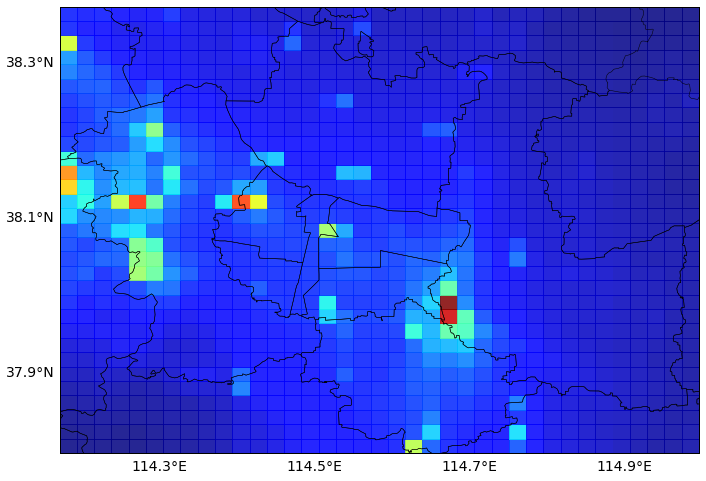

In [142]:
ig=plt.figure(figsize=(12,8))
ax = plt.gca()
map = Basemap(llcrnrlon=x_map1,llcrnrlat=y_map1,urcrnrlon=x_map2,urcrnrlat=y_map2)
map.drawparallels(np.arange(y_map1+0.1035,y_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0,color= '#FFFFFF')
map.drawmeridians(np.arange(x_map1+0.128,x_map2,0.2),labels=[1,0,0,1],size=14,linewidth=0)
map.readshapefile('/Users/HYF/Documents/SJZ/pre/sjz_xin/sjz_xin','sjz_xin',zorder =4)
lon_grid_ct  = np.linspace(x_map1,x_map2,len(x_grid)+1)
lat_grid_ct  = np.linspace(y_map1,y_map2,len(y_grid)+1)
xx,yy = np.meshgrid(lon_grid_ct,lat_grid_ct)

# clev = [10,20,30,40,60,80,100,150,200,250]

# ct = plt.contour(xx,yy,so2)
# ct = plt.contour(xx,yy,so2_grid,6,origin='lower',linewidths=2,extent=(-3, 3, -2, 2),
#                 colors=cs)
                 
# plt.clabel(ct, fontsize=3, inline=1, fmt='%1.1f',color = 'k')


p =plt.pcolor(xx,yy,so2_grid,cmap =plt.cm.jet,alpha =0.85,zorder =2)



### 3. 浓度评价

In [246]:
## 14:48之前完成不需脑子的工作

s1 = pd.read_csv("./data/观测位点浓度日均/1月模拟值-2km分辨率.csv")
s2 = pd.read_csv("./data/观测位点浓度日均/4月模拟值-2km分辨率.csv")
s3 = pd.read_csv("./data/观测位点浓度日均/7月模拟值-2km分辨率.csv")
s4 = pd.read_csv("./data/观测位点浓度日均/10月模拟值-2km分辨率.csv")
### 1月
sim_s_1 = pd.concat([s1.gx_so2,s1.hg_so2,s1.xb_so2,s1.hg_so2,s1.xb_so2,s1.sj_so2,s1.rm_so2])
obs_s_1 = pd.concat([f1.gx_so2[1:-1],f1.hg_so2[1:-1],f1.xb_so2[1:-1],f1.hg_so2[1:-1],f1.xb_so2[1:-1],
                f1.sj_so2[1:-1],f1.rm_so2[1:-1]])
### 4月
sim_s_2 = pd.concat([s2.gx_so2,s2.hg_so2,s2.xb_so2,s2.hg_so2,s2.xb_so2,s2.sj_so2,s2.rm_so2])
obs_s_2 = pd.concat([f2.gx_so2[1:],f2.hg_so2[1:],f2.xb_so2[1:],f2.hg_so2[1:],f2.xb_so2[1:],
                f2.sj_so2[1:],f2.rm_so2[1:]])
### 7月
sim_s_3 = pd.concat([s3.gx_so2,s3.hg_so2,s3.xb_so2,s3.hg_so2,s3.xb_so2,s3.sj_so2,s3.rm_so2])
obs_s_3 = pd.concat([f3.gx_so2[1:],f3.hg_so2[1:],f3.xb_so2[1:],f3.hg_so2[1:],f3.xb_so2[1:],
                f3.sj_so2[1:],f3.rm_so2[1:]])

### 10月
sim_s_4 = pd.concat([s4.gx_so2,s4.hg_so2,s4.xb_so2,s4.hg_so2,s4.xb_so2,s4.sj_so2,s4.rm_so2])
obs_s_4 = pd.concat([f4.gx_so2[1:],f4.hg_so2[1:],f4.xb_so2[1:],f4.hg_so2[1:],f4.xb_so2[1:],
                f4.sj_so2[1:],f4.rm_so2[1:]])

### 1月
sim_n_1 = pd.concat([s1.gx_no2,s1.hg_no2,s1.xb_no2,s1.hg_no2,s1.xb_no2,s1.sj_no2,s1.rm_no2])
obs_n_1 = pd.concat([f1.gx_no2[1:-1],f1.hg_no2[1:-1],f1.xb_no2[1:-1],f1.hg_no2[1:-1],f1.xb_no2[1:-1],
                f1.sj_no2[1:-1],f1.rm_no2[1:-1]])
### 4月
sim_n_2 = pd.concat([s2.gx_no2,s2.hg_no2,s2.xb_no2,s2.hg_no2,s2.xb_no2,s2.sj_no2,s2.rm_no2])
obs_n_2 = pd.concat([f2.gx_no2[1:],f2.hg_no2[1:],f2.xb_no2[1:],f2.hg_no2[1:],f2.xb_no2[1:],
                f2.sj_no2[1:],f2.rm_no2[1:]])
### 7月
sim_n_3 = pd.concat([s3.gx_no2,s3.hg_no2,s3.xb_no2,s3.hg_no2,s3.xb_no2,s3.sj_no2,s3.rm_no2])
obs_n_3 = pd.concat([f3.gx_no2[1:],f3.hg_no2[1:],f3.xb_no2[1:],f3.hg_no2[1:],f3.xb_no2[1:],
                f3.sj_no2[1:],f3.rm_no2[1:]])

### 10月
sim_n_4 = pd.concat([s4.gx_no2,s4.hg_no2,s4.xb_no2,s4.hg_no2,s4.xb_no2,s4.sj_no2,s4.rm_no2])
obs_n_4 = pd.concat([f4.gx_no2[1:],f4.hg_no2[1:],f4.xb_no2[1:],f4.hg_no2[1:],f4.xb_no2[1:],
                f4.sj_no2[1:],f4.rm_no2[1:]])

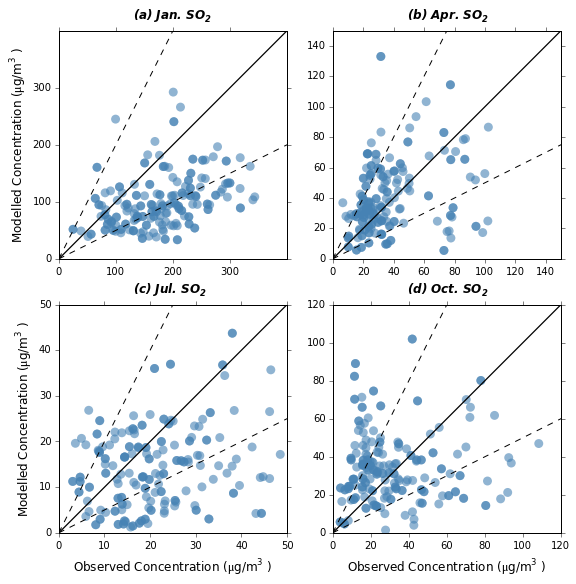

In [254]:
from scipy.stats import gaussian_kde
fig = plt.figure(figsize= (9,9))
ax1 = plt.subplot(221)

# xy = np.vstack([obs_s_1,sim_s_1])
# z = gaussian_kde(xy)(xy)
# idx = z.argsort()
# obs_s_x,sim_s_y,  z = obs_s_1[idx], obs_s_1[idx], z[idx]

ax1.scatter(obs_s_1,sim_s_1,color = 'steelblue',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax1.set_aspect('equal')
ax1.set_xlim(0,400)
ax1.set_ylim(0,400)
ax1.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax1.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax1.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax1.set_xticks([0,100,200,300])
ax1.set_yticks([0,100,200,300])
ax1.set_ylabel(r'$\mathregular{Modelled\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax1.annotate(r'$\mathregular{(a)\ Jan.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
###
ax2 = plt.subplot(222)
plt.scatter(obs_s_2,sim_s_2,color = 'steelblue',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax2.set_aspect('equal')
ax2.set_xlim(0,150)
ax2.set_ylim(0,150)
ax2.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax2.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax2.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax2.annotate(r'$\mathregular{(b)\ Apr.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
###
ax3 = plt.subplot(223)
plt.scatter(obs_s_3,sim_s_3,color = 'steelblue',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax3.set_aspect('equal')
ax3.set_xlim(0,50)
ax3.set_ylim(0,50)
ax3.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax3.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax3.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax3.annotate(r'$\mathregular{(c)\ Jul.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
ax3.set_ylabel(r'$\mathregular{Modelled\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax3.set_xlabel(r'$\mathregular{Observed\ Concentration\ (\mu g/m^3)}$',fontsize = 12)

###
ax4 = plt.subplot(224)
plt.scatter(obs_s_4,sim_s_4,color = 'steelblue',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax4.set_aspect('equal')
ax4.set_xlim(0,120)
ax4.set_ylim(0,120)
ax4.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax4.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax4.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
ax4.set_xlabel(r'$\mathregular{Observed\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax4.annotate(r'$\mathregular{(d)\ Oct.\ SO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')

plt.savefig("./pic/0103/浓度量级评价//模拟-so2浓度-全年.pdf")

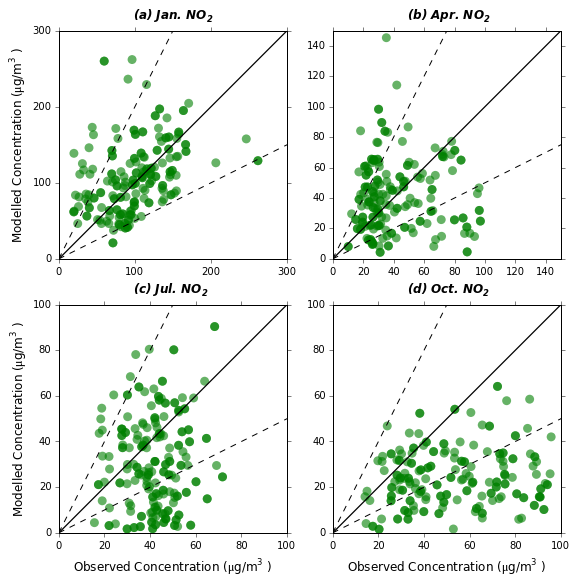

In [270]:
from scipy.stats import gaussian_kde
fig = plt.figure(figsize= (9,9))
ax1 = plt.subplot(221)

# xy = np.vstack([obs_n_1,sim_n_1])
# z = gaussian_kde(xy)(xy)
# idx = z.argsort()
# obs_n_x,sim_n_y,  z = obs_n_1[idx], obs_n_1[idx], z[idx]

ax1.scatter(obs_n_1,sim_n_1,color = 'g',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax1.set_aspect('equal')
ax1.set_xlim(0,300)
ax1.set_ylim(0,300)
ax1.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax1.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax1.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax1.set_xticks([0,100,200,300])
ax1.set_yticks([0,100,200,300])
ax1.set_ylabel(r'$\mathregular{Modelled\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax1.annotate(r'$\mathregular{(a)\ Jan.\ NO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
###
ax2 = plt.subplot(222)
plt.scatter(obs_n_2,sim_n_2,color = 'g',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax2.set_aspect('equal')
ax2.set_xlim(0,150)
ax2.set_ylim(0,150)
ax2.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax2.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax2.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax2.annotate(r'$\mathregular{(b)\ Apr.\ NO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
###
ax3 = plt.subplot(223)
plt.scatter(obs_n_3,sim_n_3,color = 'g',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax3.set_aspect('equal')
ax3.set_xlim(0,100)
ax3.set_ylim(0,100)
ax3.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax3.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax3.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
ax3.annotate(r'$\mathregular{(c)\ Jul.\ NO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
ax3.set_ylabel(r'$\mathregular{Modelled\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax3.set_xlabel(r'$\mathregular{Observed\ Concentration\ (\mu g/m^3)}$',fontsize = 12)

###
ax4 = plt.subplot(224)
plt.scatter(obs_n_4,sim_n_4,color = 'g',marker = 'o' ,s= 80,edgecolor ='',alpha =0.6 )
ax4.set_aspect('equal')
ax4.set_xlim(0,100)
ax4.set_ylim(0,100)
ax4.plot([0, 400], [0, 400], color='k', linestyle='-', linewidth=1.25)
ax4.plot([0, 400], [0, 200], color='k', linestyle='--', linewidth=1)
ax4.plot([0,200], [0, 400], color='k', linestyle='--', linewidth=1)
# ax.set_xticks([0,100,200,300])
# ax.set_yticks([0,100,200,300])
ax4.set_xlabel(r'$\mathregular{Observed\ Concentration\ (\mu g/m^3)}$',fontsize = 12)
ax4.annotate(r'$\mathregular{(d)\ Oct.\ NO_2}$',xycoords='axes fraction',xy=(0.325, 1.05),fontsize = 12, fontstyle = 'italic',fontweight = 'bold')

plt.savefig("./pic/0103/浓度量级评价/模拟-no2浓度-全年.pdf")

In [255]:
def adjust_spines(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward',0 ))  # outward by 10 points
            spine.set_smart_bounds(False)
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])

In [256]:
site = ["HG","ZG","RM","GX","XB","XN","SJ"]
type = ["Simulation","Observation"]
so2_sim = [(s1.hg_so2.mean() + s2.hg_so2.mean() + s3.hg_so2.mean() + s4.hg_so2.mean())/4.0,
 (s1.zg_so2.mean() + s2.zg_so2.mean() + s3.zg_so2.mean() + s4.zg_so2.mean())/4.0,
 (s1.rm_so2.mean() + s2.rm_so2.mean() + s3.rm_so2.mean() + s4.rm_so2.mean())/4.0,
 (s1.gx_so2.mean() + s2.gx_so2.mean() + s3.gx_so2.mean() + s4.gx_so2.mean())/4.0,
 (s1.xb_so2.mean() + s2.xb_so2.mean() + s3.xb_so2.mean() + s4.xb_so2.mean())/4.0,
 (s1.xn_so2.mean() + s2.xn_so2.mean() + s3.xn_so2.mean() + s4.xn_so2.mean())/4.0,
 (s1.sj_so2.mean() + s2.sj_so2.mean() + s3.sj_so2.mean() + s4.sj_so2.mean())/4.0,
 ]

so2_true = [(f1.hg_so2.mean() + f2.hg_so2.mean() + f3.hg_so2.mean() + f4.hg_so2.mean())/4.0,
 (f1.zg_so2.mean() + f2.zg_so2.mean() + f3.zg_so2.mean() + f4.zg_so2.mean())/4.0,
 (f1.rm_so2.mean() + f2.rm_so2.mean() + f3.rm_so2.mean() + f4.rm_so2.mean())/4.0,
 (f1.gx_so2.mean() + f2.gx_so2.mean() + f3.gx_so2.mean() + f4.gx_so2.mean())/4.0,
 (f1.xb_so2.mean() + f2.xb_so2.mean() + f3.xb_so2.mean() + f4.xb_so2.mean())/4.0,
 (f1.xn_so2.mean() + f2.xn_so2.mean() + f3.xn_so2.mean() + f4.xn_so2.mean())/4.0,
 (f1.sj_so2.mean() + f2.sj_so2.mean() + f3.sj_so2.mean() + f4.sj_so2.mean())/4.0,
 ]

[ 66.14808557  58.89637372  66.81860382  70.10556838  74.43397416
  82.47027853  75.80017367]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


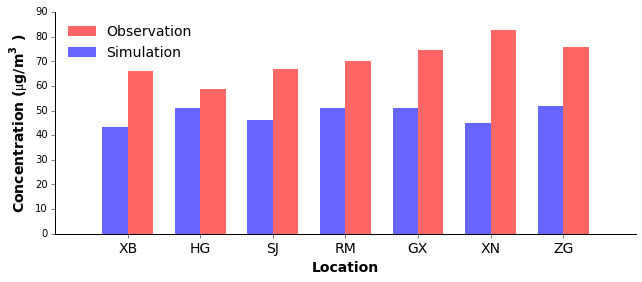

In [261]:
dpoints = np.array([[type[0], site[0], so2_sim[0] ], ### SO2 ###
                    [type[0], site[1], so2_sim[1]],
                    [type[0], site[2], so2_sim[2]],
                    [type[0], site[3], so2_sim[3]],
                    [type[0], site[4], so2_sim[4]],
                    [type[0], site[5], so2_sim[5]],
                    [type[0], site[6], so2_sim[6]],
                    [type[1], site[0], so2_true[0]], ### NO2 ###
                    [type[1], site[1], so2_true[1]],
                    [type[1], site[2], so2_true[2]],
                    [type[1], site[3], so2_true[3]],
                    [type[1], site[4], so2_true[4]],
                    [type[1], site[5], so2_true[5]],
                    [type[1], site[6], so2_true[6]]])
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)

def barplot(ax, dpoints):
    '''
    Create a barchart for data across different categories with
    multiple conditions for each category.
    
    @param ax: The plotting axes from matplotlib.
    @param dpoints: The data set as an (n, 3) numpy array
    '''
    
    # Aggregate the conditions and the categories according to their
    # mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]
    
    # sort the conditions, categories and data so that the bars in
    # the plot will be ordered by category and condition
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    categories = [c[0] for c in sorted(categories, key=o.itemgetter(1))]
    
    dpoints = np.array(sorted(dpoints, key=lambda x: categories.index(x[1])))

# the space between each set of bars
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))
    
    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(categories)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        #pos1 = [pos[0],pos[3],pos[2],pos[1]]
        #val1 =  [vals[3],vals[0],vals[1],vals[2]]
        #ls = [1.0,2.0,3.0,4.0]
        ax.bar(pos, vals, width=width, label =cond,lw = 0,color=  ["blue","r"][i],alpha = 0.6)
              # color=  ["#EFCECE","#97B58A"][i])#cm.Set3(float(i) / n))
    
    # Set the x-axis tick labels to be equal to the categories
    ax.set_xticks(indeces)
    ax.set_xticklabels(categories)
    plt.setp(plt.xticks()[1], rotation=0,fontweight = 'bold',fontsize = 12)
    print vals
    print pos
    # Add the axis labels
    ax.set_ylabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',fontweight = "bold",fontsize =14)
    ax.set_xlabel("Location",fontweight = "bold",fontsize =14)
    ax
    
    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left',frameon =False,fontsize =14)
        
barplot(ax, dpoints)
adjust_spines(ax, ['left', 'bottom'])
ax.set_xticklabels( ["XB","HG","SJ","RM","GX","XN","ZG"],fontsize = 14)
plt.tight_layout()
plt.savefig("./pic/0103/浓度量级评价//SO2-站点比较.pdf")
plt.show()

In [262]:
site = ["HG","ZG","RM","GX","XB","XN","SJ"]
type = ["Simulation","Observation"]
no2_sim = [(s1.hg_no2.mean() + s2.hg_no2.mean() + s3.hg_no2.mean() + s4.hg_no2.mean())/4.0,
 (s1.zg_no2.mean() + s2.zg_no2.mean() + s3.zg_no2.mean() + s4.zg_no2.mean())/4.0,
 (s1.rm_no2.mean() + s2.rm_no2.mean() + s3.rm_no2.mean() + s4.rm_no2.mean())/4.0,
 (s1.gx_no2.mean() + s2.gx_no2.mean() + s3.gx_no2.mean() + s4.gx_no2.mean())/4.0,
 (s1.xb_no2.mean() + s2.xb_no2.mean() + s3.xb_no2.mean() + s4.xb_no2.mean())/4.0,
 (s1.xn_no2.mean() + s2.xn_no2.mean() + s3.xn_no2.mean() + s4.xn_no2.mean())/4.0,
 (s1.sj_no2.mean() + s2.sj_no2.mean() + s3.sj_no2.mean() + s4.sj_no2.mean())/4.0,
 ]

no2_true = [(f1.hg_no2.mean() + f2.hg_no2.mean() + f3.hg_no2.mean() + f4.hg_no2.mean())/4.0,
 (f1.zg_no2.mean() + f2.zg_no2.mean() + f3.zg_no2.mean() + f4.zg_no2.mean())/4.0,
 (f1.rm_no2.mean() + f2.rm_no2.mean() + f3.rm_no2.mean() + f4.rm_no2.mean())/4.0,
 (f1.gx_no2.mean() + f2.gx_no2.mean() + f3.gx_no2.mean() + f4.gx_no2.mean())/4.0,
 (f1.xb_no2.mean() + f2.xb_no2.mean() + f3.xb_no2.mean() + f4.xb_no2.mean())/4.0,
 (f1.xn_no2.mean() + f2.xn_no2.mean() + f3.xn_no2.mean() + f4.xn_no2.mean())/4.0,
 (f1.sj_no2.mean() + f2.sj_no2.mean() + f3.sj_no2.mean() + f4.sj_no2.mean())/4.0,
 ]

[ 53.17961004  50.59398804  58.264179    60.6084117   59.44052802
  59.83414452  63.1076797 ]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]


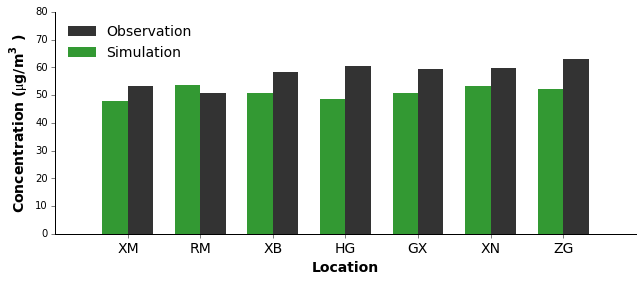

In [268]:
dpoints = np.array([[type[0], site[0], no2_sim[0] ], ### no2 ###
                    [type[0], site[1], no2_sim[1]],
                    [type[0], site[2], no2_sim[2]],
                    [type[0], site[3], no2_sim[3]],
                    [type[0], site[4], no2_sim[4]],
                    [type[0], site[5], no2_sim[5]],
                    [type[0], site[6], no2_sim[6]],
                    [type[1], site[0], no2_true[0]], ### NO2 ###
                    [type[1], site[1], no2_true[1]],
                    [type[1], site[2], no2_true[2]],
                    [type[1], site[3], no2_true[3]],
                    [type[1], site[4], no2_true[4]],
                    [type[1], site[5], no2_true[5]],
                    [type[1], site[6], no2_true[6]]])
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)

def barplot(ax, dpoints):
    '''
    Create a barchart for data across different categories with
    multiple conditions for each category.
    
    @param ax: The plotting axes from matplotlib.
    @param dpoints: The data set as an (n, 3) numpy array
    '''
    
    # Aggregate the conditions and the categories according to their
    # mean values
    conditions = [(c, np.mean(dpoints[dpoints[:,0] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,0])]
    categories = [(c, np.mean(dpoints[dpoints[:,1] == c][:,2].astype(float))) 
                  for c in np.unique(dpoints[:,1])]
    
    # sort the conditions, categories and data so that the bars in
    # the plot will be ordered by category and condition
    conditions = [c[0] for c in sorted(conditions, key=o.itemgetter(1))]
    categories = [c[0] for c in sorted(categories, key=o.itemgetter(1))]
    
    dpoints = np.array(sorted(dpoints, key=lambda x: categories.index(x[1])))

# the space between each set of bars
    space = 0.3
    n = len(conditions)
    width = (1 - space) / (len(conditions))
    
    # Create a set of bars at each position
    for i,cond in enumerate(conditions):
        indeces = range(1, len(categories)+1)
        vals = dpoints[dpoints[:,0] == cond][:,2].astype(np.float)
        pos = [j - (1 - space) / 2. + i * width for j in indeces]
        #pos1 = [pos[0],pos[3],pos[2],pos[1]]
        #val1 =  [vals[3],vals[0],vals[1],vals[2]]
        #ls = [1.0,2.0,3.0,4.0]
        ax.bar(pos, vals, width=width, label =cond,lw = 0,color=  ["g","k"][i],alpha = 0.8)
              # color=  ["#EFCECE","#97B58A"][i])#cm.Set3(float(i) / n))
    
    # Set the x-axis tick labels to be equal to the categories
    ax.set_xticks(indeces)
    ax.set_xticklabels(categories)
    plt.setp(plt.xticks()[1], rotation=0,fontweight = 'bold',fontsize = 12)
    print vals
    print pos
    # Add the axis labels
    ax.set_ylabel(r'$\mathregular{ Concentration\ (\mu g/m^3)}$',fontweight = "bold",fontsize =14)
    ax.set_xlabel("Location",fontweight = "bold",fontsize =14)
    ax.set_ylim(0,80)
    
    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper left',frameon =False,fontsize =14)
        
barplot(ax, dpoints)
adjust_spines(ax, ['left', 'bottom'])
ax.set_xticklabels( ["XM","RM","XB","HG","GX","XN","ZG"],fontsize = 14)
plt.tight_layout()
plt.savefig("./pic/0103/浓度量级评价//no2-站点比较.pdf")
plt.show()